In [15]:
import numpy as np
from matplotlib.pylab import *

# Problem 1

$$E - esin(E) = M$$
$$f(E) = E-esin(E) - M = 0$$
Use Newton's method to find the root E

In [16]:
def f(E, ec, M):
    return E - ec*np.sin(E) - M
def fd(E,ec):
    return 1 - ec*np.cos(E)


In [17]:
rcParams.update({'font.size': 20})

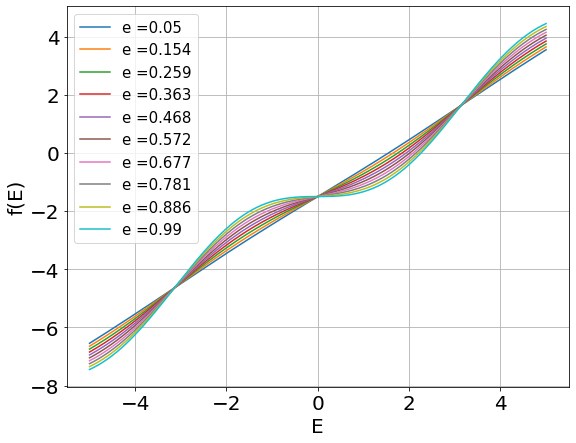

In [18]:
ec = 0.8
M = 1.5
Erange = np.linspace(-5, 5, 500)
eccRange = np.linspace(0.05,0.99,10)

figure(figsize=(9,7))
for ecc in eccRange:
    plot(Erange, f(Erange, ecc, M), label = 'e =' + str(np.round(ecc, 3)))
    ylabel('f(E)')
    xlabel('E')
    legend(fontsize=15)
    grid('on')
#     xlim([1,2.5])
#     ylim([-1.5,1])
show()

In [19]:
E = 1.5
ec = 0.05
M = 1.5
Eguess = 1.5
Eroot = []
for ecc in eccRange:
    E = Eguess
    for i in range(500):
        En = E - f(E, ecc, M)/fd(E, ecc)
        if np.abs(f(En,ecc, M)) < 1e-6:
            Eroot.append(En)
            Eguess = En + 0.05
            break
        E = En

In [317]:
Eroot

[1.5499891770514154,
 1.653911296613113,
 1.7545313245190284,
 1.8493303198071591,
 1.9367953286438406,
 2.01635596097888,
 2.088121536971957,
 2.1525979809225415,
 2.2104718935887955,
 2.2624747713782902]

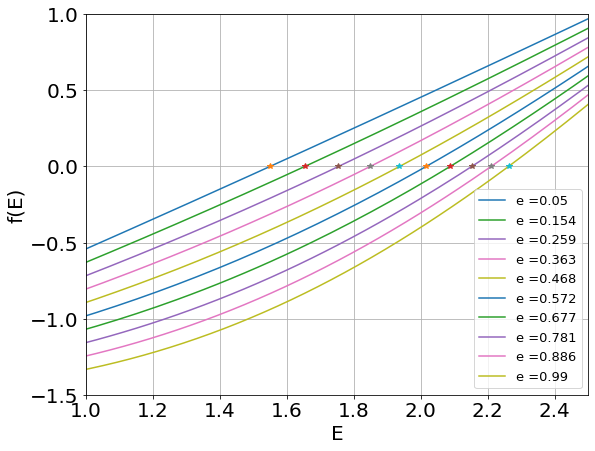

In [21]:
figure(figsize=(9,7))

for i in range(len(eccRange)):
    ecc = eccRange[i]
    plot(Erange, f(Erange, ecc, M), label = 'e =' + str(np.round(ecc, 3)))
    plot(Eroot[i], 0, '*')
    ylabel('f(E)')
    xlabel('E')
    legend(fontsize=13)
    grid('on')
    xlim([1,2.5])
    ylim([-1.5,1])
show()

$$E(M) = M - esin(M)$$

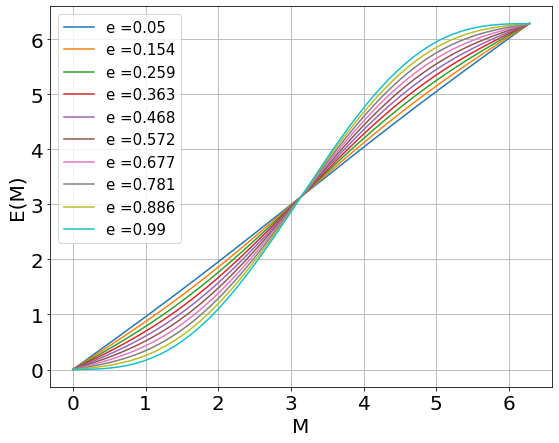

In [22]:
M = np.linspace(0, 2*pi, 500)
figure(figsize=(9,7))
for i in range(len(eccRange)):   
    plot(M, M - eccRange[i]*np.sin(M), label = 'e =' + str(np.round(eccRange[i], 3)))
    legend(fontsize=15)
xlabel('M')
ylabel('E(M)')
grid('on')
show()

# Problem 13

Generating random datasets of a line with added error. Perform linear regression and use bootstrap to estimate the uncertainty of fitting parameters. 

In [152]:
def y(x,a,b):
    return a*x +b

np.random.seed(0)
xdata = np.linspace(0, 10, 50)
sigma = np.random.normal(size=len(xdata))
ydata = y(xdata, 2, 3) + sigma

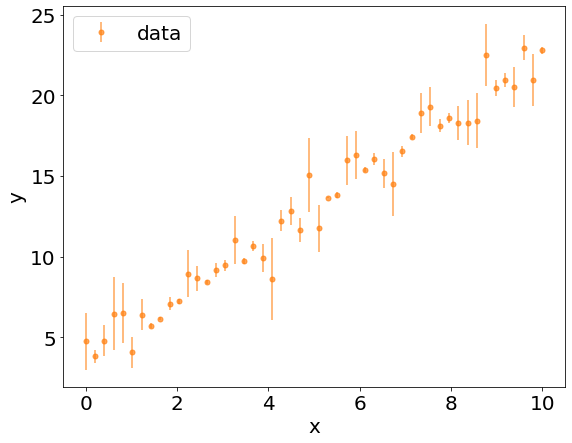

In [153]:
figure(figsize=(9,7))
errorbar(xdata,ydata ,sigma,fmt='o',c='C1',ms=5,alpha=0.7,label='data')
xlabel('x')
ylabel('y')
legend()
show()

In [154]:
from scipy.optimize import curve_fit

In [155]:
params, cov = curve_fit(y, xdata, ydata, sigma = sigma, p0 = [1.7,2.7])
dparams = sqrt(diag(cov) )
best_fit = params
print(params)
print(dparams)
chisq = sum( (ydata - y(xdata,*params) )**2 / sigma**2)
N_data = len(xdata)
N_dof = N_data - len(dparams)
print('chi-squared = %.2f, per DOF = %.2f' % (chisq, chisq/N_dof))

[1.98566381 3.09235954]
[0.01595565 0.08023136]
chi-squared = 48.50, per DOF = 1.01


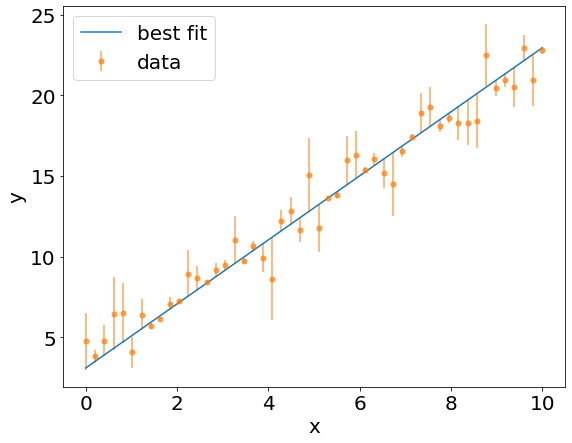

In [156]:
figure(figsize=(9,7))
errorbar(xdata,ydata ,sigma,fmt='o',c='C1',ms=5,alpha=0.7,label='data')
plot(xdata, y(xdata, best_fit[0], best_fit[1]), label = 'best fit')
xlabel('x')
ylabel('y')
legend()
show()

In [157]:
print(N_data*log(N_data)**2) ## maximum number of bootstrapping

765.1961997499532


In [166]:
np.random.seed(0)
Nbootstrap = 500
a_vals = zeros(Nbootstrap)
b_vals = zeros(Nbootstrap)
chisq_vals = zeros(Nbootstrap)
for i in range(Nbootstrap):
    idx = np.random.randint(0, N_data, size=N_data)
    ydataNew = copy(ydata[idx])
    sigmaNew = copy(sigma[idx])
    xdataNew = copy(xdata[idx])
    params, cov = curve_fit(y, xdataNew, ydataNew, sigma = sigmaNew, p0 = [1.7,2.7])
    chisq = sum( (ydataNew - y(xdataNew,*params) )**2 / sigmaNew**2)
    chisq_vals[i] = chisq
    a_vals[i] = params[0]
    b_vals[i] = params[1]

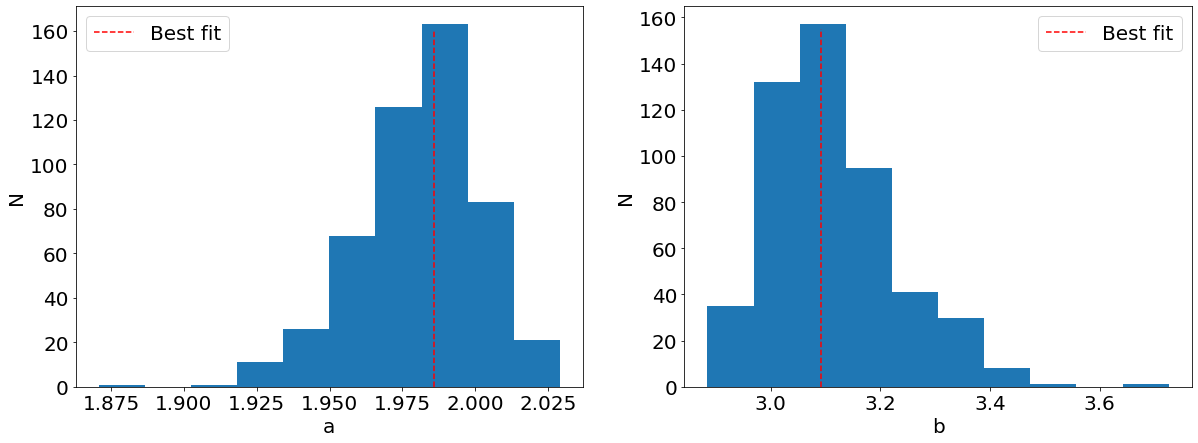

In [162]:
figure(figsize=(20,7))
subplot(1,2,1)
hist(a_vals)
vlines(best_fit[0],0, 160, linestyles = 'dashed', label ='Best fit', color = 'r')
xlabel('a')
ylabel('N')
legend()

subplot(1,2,2)
hist(b_vals)
vlines(best_fit[1],0, 155, linestyles = 'dashed', label ='Best fit', color = 'r')
legend()
xlabel('b')
ylabel('N')
show()

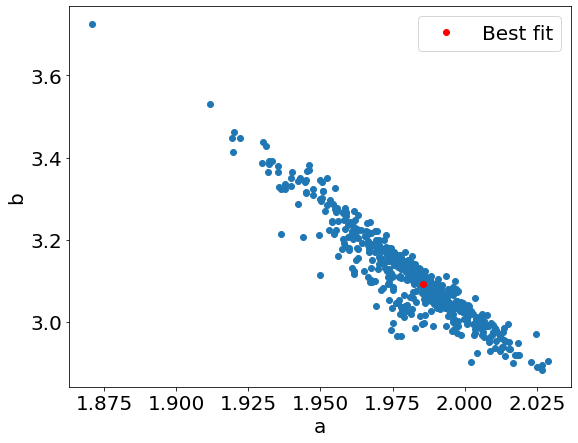

In [163]:
figure(figsize=(9,7))
scatter(a_vals,b_vals)
plot(best_fit[0], best_fit[1],'o', color ='r', label ='Best fit')
xlabel('a')
ylabel('b')
legend()
show()

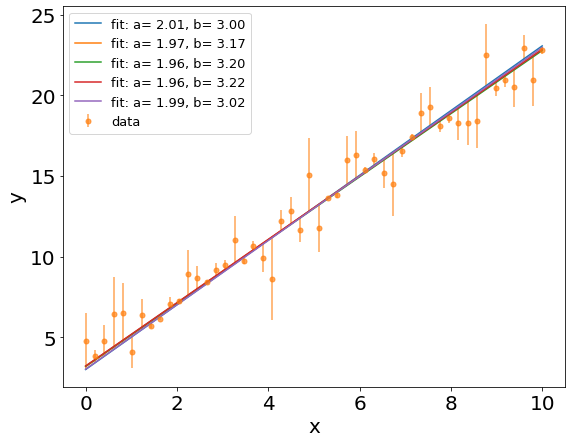

In [165]:
figure(figsize=(9,7))
for i in range(5):
    if i == 0:
        errorbar(xdata,ydata ,sigma,fmt='o',c='C1',ms=5,alpha=0.7,label='data')
    plot(xdata, y(xdata, a_vals[i+100], b_vals[i+100]), label='fit: a=%5.2f, b=%5.2f' % (a_vals[i+100], b_vals[i+100]))
    xlabel('x')
    ylabel('y')
    legend(fontsize=13)
show()

In [261]:
aSample = np.linspace(0,5,500)
bSample = np.linspace(0, 5, 500)
chi2map = zeros(shape=(len(a), len(b)))
chiMin = 1000
for i in range(len(aSample)):
    for j in range(len(bSample)):
        chisq = sum((ydata - y(xdata,aSample[i], bSample[j]) )**2 / sigma**2)
        chi2map[i,j] = chisq
        if chisq <= chiMin:
            besti = i
            bestj = j
            chiMin = chisq
chi2min = np.min(chi2map)
print('Best a: ', aSample[besti])
print('Best b:', bSample[bestj])

Best a:  1.9839679358717435
Best b: 3.096192384769539


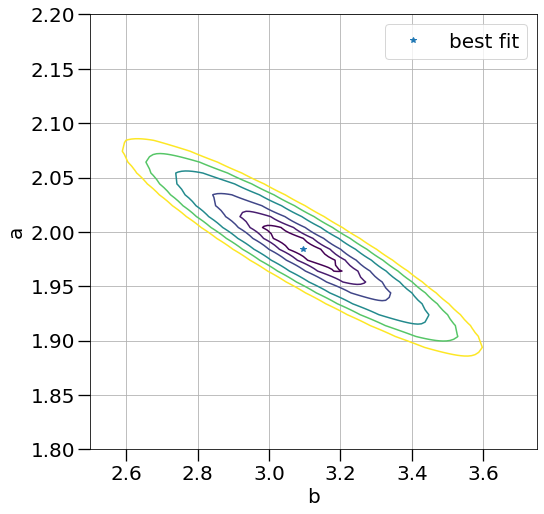

In [264]:
fig2 = plt.figure(figsize=(8,8))
aa, bb  = np.meshgrid(aSample,bSample)
contour(aa, bb, chi2map - np.min(chi2map), levels=[2,5,10,20,30,40])
plot(bSample[bestj], aSample[besti], '*',label ='best fit')
plt.xlabel('b')
plt.ylabel('a')
legend()
plt.tick_params('both', length=12, width=1.3, which='major')
xlim([2.5,3.75])
ylim([1.8, 2.2])
grid('on')
show()